# Quantum Teleportation - example

## Installing packages:

In [7]:
! pip install pylatexenc
! pip install qiskit
! pip install qiskit_aer
! pip install matplotlib

In [1]:
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np

## Warm up - generating Bell states - start with $|\phi^+\rangle$ state


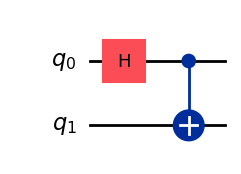

In [46]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(2, 0) # 2 qubits, 0 classical bits (no measurements now)

qc.h(0)
qc.cx(0,1)

# Visualize the circuit
qc.draw('mpl')

### State vector simulation

In [47]:
# Step 7: Simulate the circuit
backend = Aer.get_backend('statevector_simulator')

compiled_qc = transpile(qc, backend)
result = backend.run(compiled_qc, shots=1).result()

output_state = Statevector(result.get_statevector(qc))
output_state.draw("latex")

<IPython.core.display.Latex object>

### Generating the other Bell states:

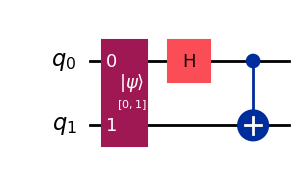

In [94]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(2, 0) # 2 qubits, 0 classical bits (no measurements now)

qc.initialize("01") # Initialize qubits
qc.h(0)
qc.cx(0,1)

# Can show the reverse:
# qc.cx(0,1)
# qc.h(0)

# Visualize the circuit
qc.draw('mpl')

In [95]:
# Step 7: Simulate the circuit
backend = Aer.get_backend('statevector_simulator')

compiled_qc = transpile(qc, backend)
result = backend.run(compiled_qc, shots=1).result()

output_state = Statevector(result.get_statevector(qc))
output_state.draw("latex")

<IPython.core.display.Latex object>

## Setting up our teleportation circuit

In [96]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(3, 3)

# Step 2: Initialize the state to be teleported
input_state = [0.6, 0.8]  # Example state |ψ> = 0.6|0> + 0.8|1>
qc.initialize(input_state, 0)

# Step 3: Create the entanglement between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# Step 4: Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step 5: Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

# Step 6: Apply corrections based on the measurement results
qc.cx(1, 2)
qc.cz(0, 2)

qc.measure(2, 2)

### Drawing the circuit

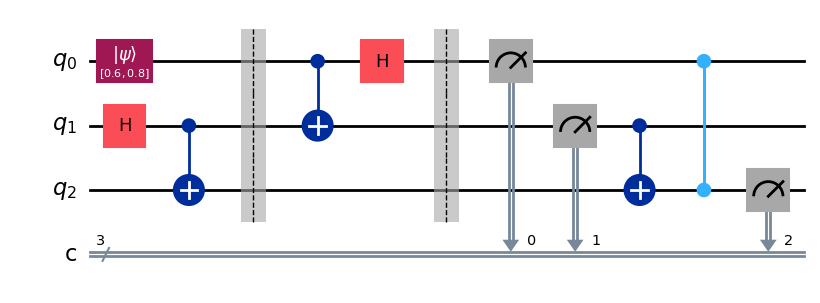

In [97]:
# Visualize the circuit
qc.draw('mpl')

## Simulating the circuit using QASM (Quantum Assembly) simulator

In [106]:
# Step 7: Simulate the circuit
backend_qasm = Aer.get_backend('qasm_simulator')

compiled_qc = transpile(qc, backend_qasm)
result_qasm = backend_qasm.run(compiled_qc, shots=100).result()
# result_qasm = backend_qasm.run(compiled_qc, shots=10000).result() # uncomment for better precision
counts = result_qasm.get_counts()

### Plotting the results

Accumulated counts: {'0': 38, '1': 62}
Proportions: {'0': 0.38, '1': 0.62}


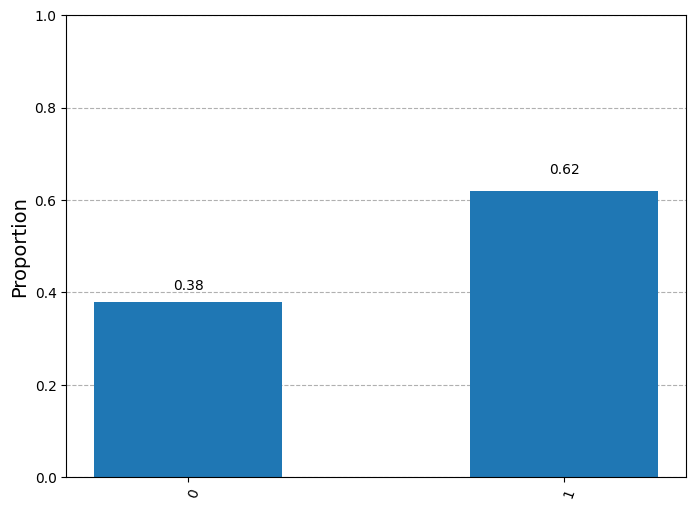

In [107]:
# Accumulate counts based on the most significant bit (MSB)
accumulated_counts = {'0': 0, '1': 0}
for key, value in counts.items():
    msb = key[0]  # Get the most significant bit
    accumulated_counts[msb] += value

# Print the accumulated counts
print("Accumulated counts:", accumulated_counts)

# Calculate total counts
total_counts = sum(accumulated_counts.values())

# Convert counts to proportions
proportions = {key: value / total_counts for key, value in accumulated_counts.items()}

# Print the proportions
print("Proportions:", proportions)

# Plot the proportions
plot_histogram(proportions, figsize=(8, 6))

# Set y-axis range from 0 to 1
plt.ylim(0, 1)
plt.ylabel('Proportion')
plt.show()

## Measurement games

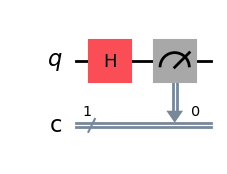

In [153]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(1, 1)

qc.h(0)
# qc.measure(0,0)
# qc.h(0)

qc.measure(0,0)

qc.draw('mpl')


In [154]:
# Step 7: Simulate the circuit
backend_qasm = Aer.get_backend('qasm_simulator')

compiled_qc = transpile(qc, backend_qasm)
result_qasm = backend_qasm.run(compiled_qc, shots=1000).result()
counts = result_qasm.get_counts()

counts

{'0': 505, '1': 495}

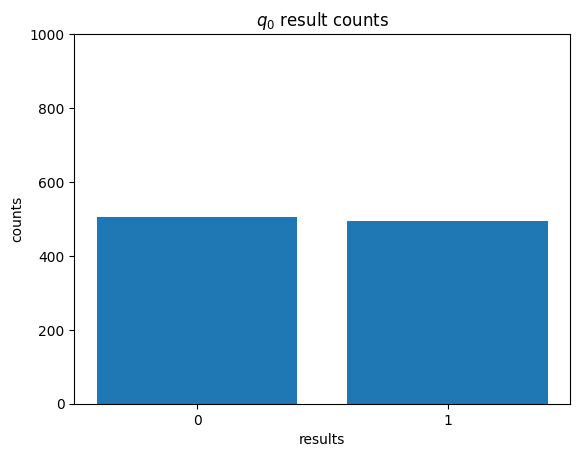

In [157]:
# Ensure both '0' and '1' are in the data
if '0' not in counts:
    counts['0'] = 0
if '1' not in counts:
    counts['1'] = 0

# Extract keys and values
labels = list(counts.keys())
values = list(counts.values())

# Create the bar plot
plt.bar(labels, values)

# Add labels and title
plt.xlabel('results')
plt.ylabel('counts')
plt.title('$q_0$ result counts')

# Set y-axis limit from 0 to 100
plt.ylim(0, sum(values))

# Show the plot
plt.show()